In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [10]:
data = loadmat('digit.mat')
train = data['X']
test = data['T']

In [17]:
print("Train data: {}".format(train.shape))
print("Test data:  {}".format(test.shape))

Train data: (256, 500, 10)
Test data:  (256, 200, 10)


(256,)


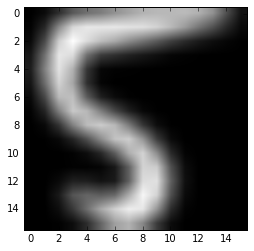

In [18]:
x=train[:, 22, 4]
print(x.shape)
plt.imshow(x.reshape(16, 16), 'gray')

In [43]:
# Make a classifier for one and two
mu1 = np.mean(train[:, :, 0], axis=1)
mu2 = np.mean(train[:, :, 1], axis=1)
S = (np.cov(train[:, :, 0]) + np.cov(train[:, :, 1])) / 2

In [44]:
t = test[:, 0, 1]
invS = np.linalg.inv(S + 0.000001 * np.identity(256))
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1)/2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2)/2
print(np.sign(p1 - p2))

[-1.]


In [49]:
t = test[:, :, 1]
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1[:, None]) / 2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2[:, None]) / 2
result = np.sign(p1 - p2)

In [54]:
print("The number of correct prediction: {}".format(np.sum(result == -1)))
print("The number of false prediction:   {}".format(np.sum(result != -1)))

The number of correct prediction: 198
The number of false prediction:   2


In [58]:
print(np.where(result != -1)[1])

[ 68 179]


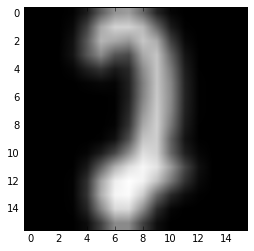

In [65]:
wrong1 = test[:, 68, 1]
plt.imshow(wrong1.reshape(16, 16), 'gray')

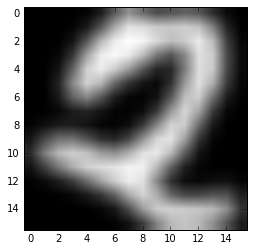

In [64]:
wrong2 = test[:, 179, 1]
plt.imshow(wrong2.reshape(16, 16), 'gray')